<center>
<h1> Sistema de Clasificación de Imagenes NASA
<h2> Inteligencia Artificial 
<h2> 2023 - 1
</center>

*Integrantes:*
- Jhon Alejandro Ramírez jramirezda@unal.edu.co
- Gerardo Sebastian Gil Sanchez ggil@unal.edu.co
- Nicolas Enrique Rodriguez Jurado	nerodriguezju@unal.edu.co
    
> Proyecto programado con la versión de <u>Python 3.9.13

En el presente estudio, se realizará la clasificación de imágenes utilizando redes neuronales convolucionales (CNN, por sus siglas en inglés). Se explorarán dos enfoques distintos: la creación de una red desde cero y el reentrenamiento de una red preentrenada mediante transfer learning. Estos métodos se aplicarán a un conjunto de datos compuesto por imágenes y etiquetas.

Las redes neuronales convolucionales son ampliamente utilizadas en tareas de visión por computadora, ya que son capaces de aprender patrones visuales y características relevantes en las imágenes. La creación de una red desde cero nos brinda la flexibilidad de diseñar la arquitectura a medida, mientras que el reentrenamiento de una red preentrenada permite aprovechar el conocimiento previo adquirido en conjuntos de datos masivos.

Para este estudio, se utilizará el conjunto de datos proporcionado en la siguiente [Imagenes orbital de Marte (HiRISE) conjunto de datos etiquetados versión 3.2](https://zenodo.org/record/4002935). Se trabajará en el preprocesamiento de las imágenes, la definición de las arquitecturas de las redes, el entrenamiento y la evaluación de los modelos resultantes.

## Descripción general de los datos

Este conjunto de datos contiene un total de 73,031 puntos de referencia. De estos, 10,433 puntos de referencia fueron detectados y extraídos de 180 imágenes de exploración de HiRISE, y 62,598 puntos de referencia fueron aumentados a partir de los 10,433 puntos de referencia originales.

Para cada punto de referencia original, se recortó una caja delimitadora cuadrada que incluye toda la extensión del punto de referencia más un margen de 30 píxeles a la izquierda, derecha, arriba y abajo. Cada punto de referencia recortado se redimensionó a 227x227 píxeles y luego se aumentó para generar 6 puntos de referencia adicionales utilizando los siguientes métodos:

Rotación de 90 grados en sentido horario
Rotación de 180 grados en sentido horario
Rotación de 270 grados en sentido horario
Volteo horizontal
Volteo vertical
Ajuste aleatorio de brillo
Este conjunto de datos es útil para la clasificación de imágenes de puntos de referencia en diferentes categorías. Los puntos de referencia se presentan como imágenes cuadradas de 227x227 píxeles, y cada imagen se ha aumentado para incluir variaciones en la orientación y el brillo. Además, se proporcionan etiquetas de clase para cada imagen, lo que permite la clasificación supervisada de los puntos de referencia utilizando técnicas de aprendizaje automático y de aprendizaje profundo.

las categorias que se usaron para etiquetar las imagenes son las siguientes: 

| Código | Descripción        |
|-------:|-------------------:|
|      0 |            other  |
|      1 |            crater |
|      2 |         dark dune |
|      3 |       slope streak |
|      4 |        bright dune |
|      5 |      impact ejecta |
|      6 |      swiss cheese  |
|      7 |   spider           |

## Procedimientos 
El proceso constará de los siguientes pasos para realizar la clasificación de imágenes utilizando redes neuronales convolucionales:

**Carga de datos:** Se deben cargar tanto las imágenes como sus etiquetas. Las imágenes se representan como matrices de píxeles y las etiquetas indican las categorías a las que pertenecen.

**Preprocesamiento de datos:** Antes de utilizar las imágenes en las redes neuronales, es común aplicar técnicas de preprocesamiento, como la normalización de píxeles, para asegurar que todas las imágenes tengan un rango de valores similar. También se pueden aplicar técnicas de aumento de datos para aumentar la cantidad de ejemplos en el conjunto de entrenamiento, como rotaciones, traslaciones o cambios de escala.

**Creación de una red neuronal convolucional desde cero:** En este enfoque, se diseñará y entrenará una red neuronal convolucional desde cero. Esto implica definir la arquitectura de la red, que consiste en capas convolucionales, capas de agrupación (pooling), capas totalmente conectadas y capas de salida. Luego, se entrenará la red utilizando el conjunto de datos de entrenamiento, ajustando los pesos de las conexiones entre las neuronas mediante la retropropagación del error.

**Reentrenamiento de una red neuronal convolucional existente:** En este enfoque, se utilizará una red neuronal convolucional preentrenada, [ResNet](https://huggingface.co/microsoft/resnet-50) que ha sido entrenada en un gran conjunto de datos. Se tomará esta red preentrenada y se ajustarán sus pesos utilizando el conjunto de datos específico de imágenes y etiquetas proporcionado. Este proceso se conoce como "transfer learning". La idea es aprovechar los conocimientos aprendidos por la red preentrenada en tareas generales de clasificación de imágenes y adaptarlos a la tarea específica en cuestión.

**Evaluación y comparación de resultados:** Una vez entrenadas ambas redes (la creada desde cero y la preentrenada con transfer learning), se deben evaluar y comparar sus resultados utilizando un conjunto de datos de prueba. Se pueden analizar métricas como la precisión, la exhaustividad y la puntuación F1 para medir el rendimiento de las redes en la clasificación de las imágenes.

Este procedimiento permite explorar las virtudes de ambos métodos: crear una red desde cero brinda flexibilidad en el diseño de la arquitectura y permite un ajuste más preciso a los datos específicos, mientras que utilizar transfer learning con una red preentrenada aprovecha el conocimiento previo y puede ahorrar tiempo y recursos de entrenamiento.

## preprocesamiento de los datos 
En primer lugar, obtenemos los nombres de las imágenes de la carpeta donde las tenemos almacenadas. Utilizaremos esta información junto con los nombres y etiquetas que se encuentran en el archivo "labels-map-proj-v3.txt" que posteriormente convertiremos en un archivo CSV por facilidad. Realizaremos la carga de los datos etiquetados.

In [1]:
import os
datos=os.listdir("C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/map-proj-v3_2")
print(len(datos))
print(datos)

32182
['ESP_011283_2265_RED-0013-fv.jpg', 'ESP_011283_2265_RED-0013-r180.jpg', 'ESP_011283_2265_RED-0017-brt.jpg', 'ESP_011283_2265_RED-0017-fv.jpg', 'ESP_011283_2265_RED-0017-r270.jpg', 'ESP_011283_2265_RED-0017-r90.jpg', 'ESP_011283_2265_RED-0030-brt.jpg', 'ESP_011283_2265_RED-0030-fh.jpg', 'ESP_011283_2265_RED-0030-r180.jpg', 'ESP_011283_2265_RED-0030-r90.jpg', 'ESP_011283_2265_RED-0030.jpg', 'ESP_011289_1950_RED-0015.jpg', 'ESP_011289_1950_RED-0039.jpg', 'ESP_011289_1950_RED-0058.jpg', 'ESP_011289_1950_RED-0063.jpg', 'ESP_011289_1950_RED-0066.jpg', 'ESP_011289_1950_RED-0067.jpg', 'ESP_011289_1950_RED-0070.jpg', 'ESP_011289_1950_RED-0076.jpg', 'ESP_011289_1950_RED-0098.jpg', 'ESP_011289_1950_RED-0099.jpg', 'ESP_011289_1950_RED-0100.jpg', 'ESP_011289_1950_RED-0101.jpg', 'ESP_011289_1950_RED-0102.jpg', 'ESP_011289_1950_RED-0104.jpg', 'ESP_011289_1950_RED-0112.jpg', 'ESP_011289_1950_RED-0138.jpg', 'ESP_011289_1950_RED-0139.jpg', 'ESP_011289_1950_RED-0162.jpg', 'ESP_011289_1950_RED-0166

In [2]:
# Ruta del archivo de texto
ruta_archivo_txt = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.txt"

# Ruta del archivo CSV de salida
ruta_archivo_csv = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.csv"

# Abrir el archivo de texto en modo lectura
with open(ruta_archivo_txt, "r") as file:
    lineas = file.readlines()

# Abrir el archivo CSV en modo escritura
with open(ruta_archivo_csv, "w") as file:
    # Recorrer las líneas del archivo de texto
    for linea in lineas:
        # Eliminar los espacios en blanco al inicio y final de la línea
        linea = linea.strip()

        # Dividir la línea en elementos utilizando el espacio como delimitador
        elementos = linea.split(" ")

        # Unir los elementos con comas para formar una línea en formato CSV
        linea_csv = ",".join(elementos)

        # Escribir la línea en el archivo CSV
        file.write(linea_csv + "\n")

print("Archivo CSV generado exitosamente.")

Archivo CSV generado exitosamente.


In [3]:
import cv2
import numpy as np
import os
import csv

carpeta_imagenes = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/map-proj-v3_2"

# Lista de nombres de archivos
nombres_archivos = os.listdir(carpeta_imagenes)

# Ruta del archivo CSV con los nombres de imágenes, etiquetas y categorías
ruta_archivo_csv = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.csv"

# Diccionarios para almacenar las imágenes y etiquetas de train, test y val
imagenes_train = {}
etiquetas_train = {}
imagenes_test = {}
etiquetas_test = {}
imagenes_val = {}
etiquetas_val = {}

# Leer el archivo CSV
with open(ruta_archivo_csv, "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        nombre_imagen, etiqueta, categoria = row

        # Verificar si el nombre de la imagen está en la lista de nombres de archivos
        if nombre_imagen in nombres_archivos:
            ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
            imagen = cv2.imread(ruta_imagen)
            etiqueta = int(etiqueta)

            # Asignar la imagen y etiqueta a la categoría correspondiente
            if categoria == "train":
                imagenes_train[nombre_imagen] = imagen
                etiquetas_train[nombre_imagen] = etiqueta
            elif categoria == "test":
                imagenes_test[nombre_imagen] = imagen
                etiquetas_test[nombre_imagen] = etiqueta
            elif categoria == "val":
                imagenes_val[nombre_imagen] = imagen
                etiquetas_val[nombre_imagen] = etiqueta

# Convertir los diccionarios a listas de numpy
imagenes_train = np.array(list(imagenes_train.values()))
etiquetas_train = np.array(list(etiquetas_train.values()))
imagenes_test = np.array(list(imagenes_test.values()))
etiquetas_test = np.array(list(etiquetas_test.values()))
imagenes_val = np.array(list(imagenes_val.values()))
etiquetas_val = np.array(list(etiquetas_val.values()))


In [4]:
#comvertir a escala de grises
imagenes_train_grises = np.array([cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) for imagen in imagenes_train])
imagenes_test_grises = np.array([cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) for imagen in imagenes_test])
imagenes_val_grises = np.array([cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) for imagen in imagenes_val])

In [5]:
print(len(imagenes_train),len(etiquetas_train),len(imagenes_test),len(etiquetas_test),len(imagenes_val),len(etiquetas_val))

24225 24225 862 862 7095 7095


In [7]:
# verificamos cuantas imagenes hay de cada categoria por etiqueta

import numpy as np

# Contar el número de imágenes por categoría de etiquetas en el conjunto de entrenamiento
conteo_entrenamiento = np.bincount(etiquetas_train)
num_imagenes_entrenamiento = len(imagenes_train)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_entrenamiento):
    print("por entrenamiento Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_entrenamiento) * 100))

# Contar el número de imágenes por categoría de etiquetas en el conjunto de prueba
conteo_prueba = np.bincount(etiquetas_test)
num_imagenes_prueba = len(imagenes_test)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_prueba):
    print("por test Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_prueba) * 100))

# Contar el número de imágenes por categoría de etiquetas en el conjunto de validación
conteo_validacion = np.bincount(etiquetas_val)
num_imagenes_validacion = len(imagenes_val)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_validacion):
    print("por validacion Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_validacion) * 100))


por entrenamiento Categoría 0: 19829 imágenes (81.85345717234263%)
por entrenamiento Categoría 1: 1754 imágenes (7.2404540763673895%)
por entrenamiento Categoría 2: 299 imágenes (1.2342621259029927%)
por entrenamiento Categoría 3: 450 imágenes (1.8575851393188854%)
por entrenamiento Categoría 4: 789 imágenes (3.2569659442724457%)
por entrenamiento Categoría 5: 167 imágenes (0.6893704850361196%)
por entrenamiento Categoría 6: 619 imágenes (2.5552115583075334%)
por entrenamiento Categoría 7: 318 imágenes (1.3126934984520122%)
por test Categoría 0: 700 imágenes (81.20649651972158%)
por test Categoría 1: 45 imágenes (5.220417633410673%)
por test Categoría 2: 39 imágenes (4.524361948955916%)
por test Categoría 3: 30 imágenes (3.480278422273782%)
por test Categoría 4: 9 imágenes (1.0440835266821344%)
por test Categoría 5: 2 imágenes (0.23201856148491878%)
por test Categoría 6: 19 imágenes (2.2041763341067284%)
por test Categoría 7: 18 imágenes (2.088167053364269%)
por validacion Categoría 0:

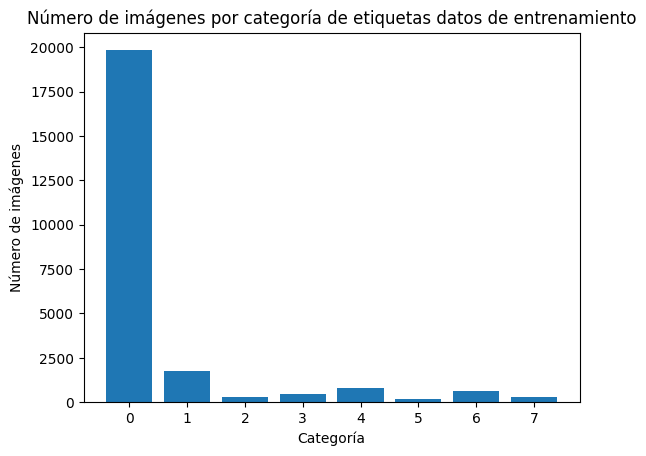

In [12]:
import numpy as np
import matplotlib.pyplot as plt
categorias = np.arange(len(conteo_entrenamiento))

# Crear el gráfico de barras
plt.bar(categorias, conteo_entrenamiento)

# Configurar el título y las etiquetas de los ejes
plt.title("Número de imágenes por categoría de etiquetas datos de entrenamiento")
plt.xlabel("Categoría")
plt.ylabel("Número de imágenes")

# Mostrar el gráfico
plt.show()

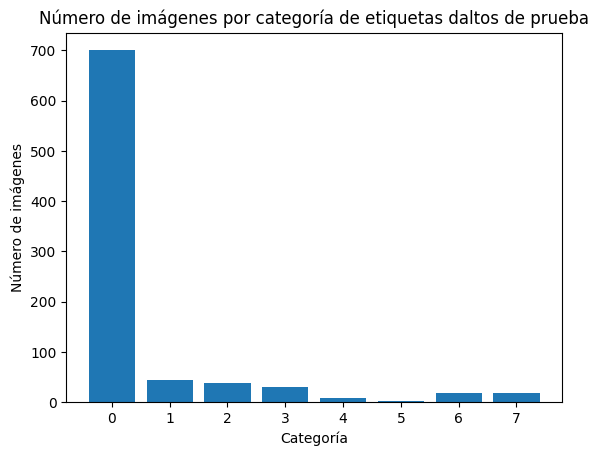

In [11]:
import numpy as np
import matplotlib.pyplot as plt
categorias = np.arange(len(conteo_prueba))

# Crear el gráfico de barras
plt.bar(categorias, conteo_prueba)

# Configurar el título y las etiquetas de los ejes
plt.title("Número de imágenes por categoría de etiquetas daltos de prueba")
plt.xlabel("Categoría")
plt.ylabel("Número de imágenes")

# Mostrar el gráfico
plt.show()

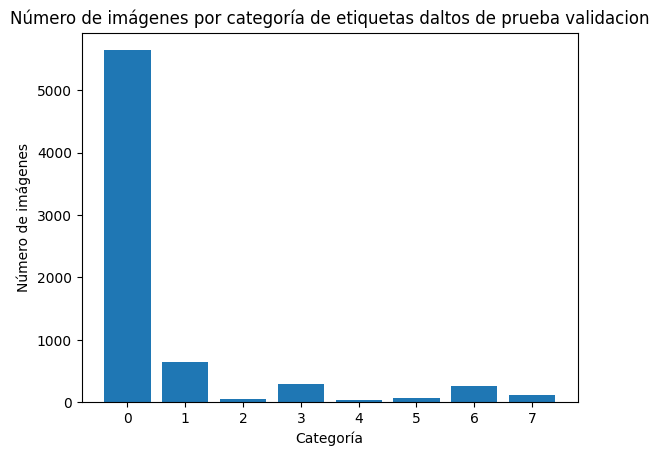

In [13]:
import numpy as np
import matplotlib.pyplot as plt
categorias = np.arange(len(conteo_validacion))

# Crear el gráfico de barras
plt.bar(categorias, conteo_validacion)

# Configurar el título y las etiquetas de los ejes
plt.title("Número de imágenes por categoría de etiquetas daltos de prueba validacion")
plt.xlabel("Categoría")
plt.ylabel("Número de imágenes")

# Mostrar el gráfico
plt.show()

Es claro que existen muchos mas datos de la categoria 0 por lo que vamos a tomar igual cantidad de esta que de el promedio de las otras categorias.

In [98]:
import numpy as np

# Calcular el promedio de datos por categoría (excluyendo la categoría 0)
promedio_datos_train = int(np.mean(np.bincount(etiquetas_train[etiquetas_train != 0])))
promedio_datos_test = int(np.mean(np.bincount(etiquetas_test[etiquetas_test != 0])))
promedio_datos_val = int(np.mean(np.bincount(etiquetas_val[etiquetas_val != 0])))


# Seleccionar índices aleatorios de la categoría 0 train
indices_categoria_0_train = np.where(etiquetas_train == 0)[0]
indices_seleccionados_train = np.random.choice(indices_categoria_0_train, size=promedio_datos_train, replace=False)
# Seleccionar índices aleatorios de la categoría 0 test
indices_categoria_0_test = np.where(etiquetas_test == 0)[0]
indices_seleccionados_test = np.random.choice(indices_categoria_0_test, size=promedio_datos_test, replace=False)
# Seleccionar índices aleatorios de la categoría 0 validacion
indices_categoria_0_val = np.where(etiquetas_val == 0)[0]
indices_seleccionados_val = np.random.choice(indices_categoria_0_val, size=promedio_datos_val, replace=False)

# Obtener los datos seleccionados para la categoría 0 en los conjuntos de entrenamiento, prueba y validación
nuevas_imagenes_train = imagenes_train_grises[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]
nuevas_etiquetas_train = etiquetas_train[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]

nuevas_imagenes_test = imagenes_test_grises[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]
nuevas_etiquetas_test = etiquetas_test[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]

nuevas_imagenes_val = imagenes_val_grises[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]
nuevas_etiquetas_val = etiquetas_val[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]

In [65]:
# verificamos cuantas imagenes hay de cada categoria por etiqueta

import numpy as np

# Contar el número de imágenes por categoría de etiquetas en el conjunto de entrenamiento
conteo_entrenamiento = np.bincount(nuevas_etiquetas_train)
num_imagenes_entrenamiento = len(nuevas_imagenes_train)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_entrenamiento):
    print("por entrenamiento Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_entrenamiento) * 100))

# Contar el número de imágenes por categoría de etiquetas en el conjunto de prueba
conteo_prueba = np.bincount(nuevas_etiquetas_test)
num_imagenes_prueba = len(nuevas_imagenes_test)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_prueba):
    print("por test Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_prueba) * 100))

# Contar el número de imágenes por categoría de etiquetas en el conjunto de validación
conteo_validacion = np.bincount(nuevas_etiquetas_val)
num_imagenes_validacion = len(nuevas_imagenes_val)

# Imprimir los resultados
for categoria, conteo in enumerate(conteo_validacion):
    print("por validacion Categoría {}: {} imágenes ({}%)".format(categoria, conteo, (conteo / num_imagenes_validacion) * 100))

por entrenamiento Categoría 0: 549 imágenes (11.102123356926189%)
por entrenamiento Categoría 1: 1754 imágenes (35.47017189079879%)
por entrenamiento Categoría 2: 299 imágenes (6.046511627906977%)
por entrenamiento Categoría 3: 450 imágenes (9.100101112234581%)
por entrenamiento Categoría 4: 789 imágenes (15.955510616784633%)
por entrenamiento Categoría 5: 167 imágenes (3.3771486349848336%)
por entrenamiento Categoría 6: 619 imágenes (12.517694641051566%)
por entrenamiento Categoría 7: 318 imágenes (6.430738119312437%)
por test Categoría 0: 20 imágenes (10.989010989010989%)
por test Categoría 1: 45 imágenes (24.725274725274726%)
por test Categoría 2: 39 imágenes (21.428571428571427%)
por test Categoría 3: 30 imágenes (16.483516483516482%)
por test Categoría 4: 9 imágenes (4.945054945054945%)
por test Categoría 5: 2 imágenes (1.098901098901099%)
por test Categoría 6: 19 imágenes (10.43956043956044%)
por test Categoría 7: 18 imágenes (9.89010989010989%)
por validacion Categoría 0: 181 im

In [99]:
print(len(nuevas_imagenes_train),len(nuevas_etiquetas_train),len(nuevas_imagenes_test),len(nuevas_etiquetas_test),len(nuevas_imagenes_val),len(nuevas_etiquetas_val))

4945 4945 182 182 1634 1634


# Primero preprocesamos los datos para dejarlos en el intervalo [0,1]

In [100]:
import numpy as np
# Normalización de los lotes de imágenes
nuevas_imagenes_train = nuevas_imagenes_train.astype('float32') / 255.0
nuevas_imagenes_test = nuevas_imagenes_test.astype('float32') / 255.0
nuevas_imagenes_val = nuevas_imagenes_val.astype('float32') / 255.0

In [68]:
# Mezclar aleatoriamente los conjuntos de imágenes y etiquetas
indices = np.arange(len(nuevas_imagenes_train))
np.random.shuffle(indices)
imagenes_train = nuevas_imagenes_train[indices]
nuevas_etiquetas_train = nuevas_etiquetas_train[indices]

indices = np.arange(len(nuevas_imagenes_test))
np.random.shuffle(indices)
nuevas_imagenes_test = nuevas_imagenes_test[indices]
nuevas_etiquetas_test = nuevas_etiquetas_test[indices]

indices = np.arange(len(nuevas_imagenes_val))
np.random.shuffle(indices)
nuevas_imagenes_val = nuevas_imagenes_val[indices]
nuevas_etiquetas_val = nuevas_etiquetas_val[indices]

#Verificar que las listas tengan la misma cantidad de datos que al principio
assert len(nuevas_imagenes_train) == len(nuevas_etiquetas_train)
assert len(nuevas_imagenes_test) == len(nuevas_etiquetas_test)
assert len(nuevas_imagenes_val) == len(nuevas_etiquetas_val)

## Creamos nuevos conjuntos de datos de solo el 20 % de la totalidad de imagenes.

In [50]:
#import numpy as np
#from sklearn.model_selection import train_test_split

# Convertir los conjuntos de datos en listas
#imagenes_train = list(imagenes_train)
#etiquetas_train = list(etiquetas_train)
#imagenes_test = list(imagenes_test)
#etiquetas_test = list(etiquetas_test)
#imagenes_val = list(imagenes_val)
#etiquetas_val = list(etiquetas_val)

# Obtener el 10% de cada conjunto de datos de forma aleatoria
#nuevas_imagenes_train = []
#nuevas_etiquetas_train = []
#nuevas_imagenes_test = []
#nuevas_etiquetas_test = []
#nuevas_imagenes_val = []
#nuevas_etiquetas_val = []

# Obtener las clases únicas del conjunto de entrenamiento
#clases = np.unique(etiquetas_train)

# Iterar sobre cada clase
#for clase in clases:
    # Obtener los índices de los datos que pertenecen a la clase actual
 #   indices_clase = np.where(etiquetas_train == clase)[0]
    
    # Calcular el número de elementos para seleccionar (20% de los datos de la clase)
 #   num_elementos_seleccionar = int(len(indices_clase) * 0.2)
    
    # Seleccionar aleatoriamente los índices de los elementos a incluir
#    indices_seleccionados = np.random.choice(indices_clase, size=num_elementos_seleccionar, replace=False)
    
    # Agregar las imágenes y las etiquetas seleccionadas a los conjuntos nuevos
 #   nuevas_imagenes_train.extend([imagenes_train[i] for i in indices_seleccionados])
#    nuevas_etiquetas_train.extend([etiquetas_train[i] for i in indices_seleccionados])

# Convertir los conjuntos nuevos a arreglos de NumPy
#nuevas_imagenes_train = np.array(nuevas_imagenes_train)
#nuevas_etiquetas_train = np.array(nuevas_etiquetas_train)

In [51]:

# Obtener las clases únicas del conjunto de entrenamiento
#clases = np.unique(etiquetas_test)

# Iterar sobre cada clase
#for clase in clases:
    # Obtener los índices de los datos que pertenecen a la clase actual
#    indices_clase = np.where(etiquetas_test == clase)[0]
    
    # Calcular el número de elementos para seleccionar (20% de los datos de la clase)
 #   num_elementos_seleccionar = int(len(indices_clase) * 0.2)
    
    # Seleccionar aleatoriamente los índices de los elementos a incluir
 #   indices_seleccionados = np.random.choice(indices_clase, size=num_elementos_seleccionar, replace=False)
    
    # Agregar las imágenes y las etiquetas seleccionadas a los conjuntos nuevos
#    nuevas_imagenes_test.extend([imagenes_test[i] for i in indices_seleccionados])
#    nuevas_etiquetas_test.extend([etiquetas_test[i] for i in indices_seleccionados])

# Convertir los conjuntos nuevos a arreglos de NumPy
#nuevas_imagenes_test = np.array(nuevas_imagenes_test)
#nuevas_etiquetas_test = np.array(nuevas_etiquetas_test)

In [52]:

# Obtener las clases únicas del conjunto de entrenamiento
#clases = np.unique(etiquetas_val)

# Iterar sobre cada clase
#for clase in clases:
    # Obtener los índices de los datos que pertenecen a la clase actual
#    indices_clase = np.where(etiquetas_val == clase)[0]
    
    # Calcular el número de elementos para seleccionar (20% de los datos de la clase)
#    num_elementos_seleccionar = int(len(indices_clase) * 0.2)
    
    # Seleccionar aleatoriamente los índices de los elementos a incluir
#    indices_seleccionados = np.random.choice(indices_clase, size=num_elementos_seleccionar, replace=False)
    
    # Agregar las imágenes y las etiquetas seleccionadas a los conjuntos nuevos
#    nuevas_imagenes_val.extend([imagenes_val[i] for i in indices_seleccionados])
#    nuevas_etiquetas_val.extend([etiquetas_val[i] for i in indices_seleccionados])

# Convertir los conjuntos nuevos a arreglos de NumPy
#nuevas_imagenes_val = np.array(nuevas_imagenes_val)
#nuevas_etiquetas_val = np.array(nuevas_etiquetas_val)

In [71]:
print(len(nuevas_imagenes_train),len(nuevas_etiquetas_train),len(nuevas_imagenes_test),len(nuevas_etiquetas_test),len(nuevas_imagenes_val),len(nuevas_etiquetas_val))

4945 4945 182 182 1634 1634


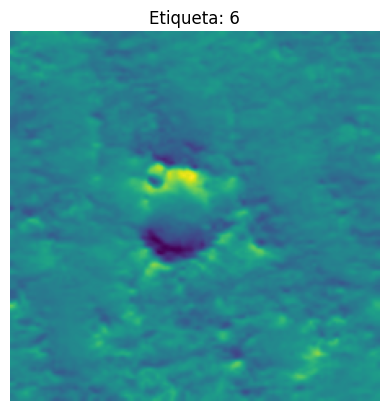

In [48]:
import random

# Obtener un índice aleatorio
indice_aleatorio = random.randint(0, len(nuevas_imagenes_train) - 1)

# Obtener la imagen y la etiqueta correspondiente
imagen_aleatoria = nuevas_imagenes_train[indice_aleatorio]
etiqueta_aleatoria = nuevas_etiquetas_train[indice_aleatorio]

# Mostrar la imagen y la etiqueta
plt.imshow(imagen_aleatoria)
plt.title(f"Etiqueta: {etiqueta_aleatoria}")
plt.axis('off')
plt.show()

# Hacemos un primer modelo convolucional.

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import random

# Definir el modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Resumen del modelo
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 96800)             0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [73]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
# Entrenar el modelo
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 47s 303ms/step - loss: 1.9028 - accuracy: 0.3498 - val_loss: 1.8409 - val_accuracy: 0.3953
Epoch 2/10
155/155 [==============================] - 47s 306ms/step - loss: 1.8517 - accuracy: 0.3547 - val_loss: 1.8454 - val_accuracy: 0.3953
Epoch 3/10
155/155 [==============================] - 48s 309ms/step - loss: 1.8261 - accuracy: 0.3557 - val_loss: 1.8462 - val_accuracy: 0.3953
Epoch 4/10
155/155 [==============================] - 48s 310ms/step - loss: 1.7873 - accuracy: 0.3573 - val_loss: 1.8616 - val_accuracy: 0.3947
Epoch 5/10
155/155 [==============================] - 48s 310ms/step - loss: 1.7358 - accuracy: 0.3624 - val_loss: 1.9259 - val_accuracy: 0.3905
Epoch 6/10
155/155 [==============================] - 48s 312ms/step - loss: 1.6615 - accuracy: 0.3814 - val_loss: 2.0217 - val_accuracy: 0.3837
Epoch 7/10
155/155 [==============================] - 49s 316ms/step - loss: 1.5583 - accuracy: 0.4119 - val_loss: 2.0379 - val_ac

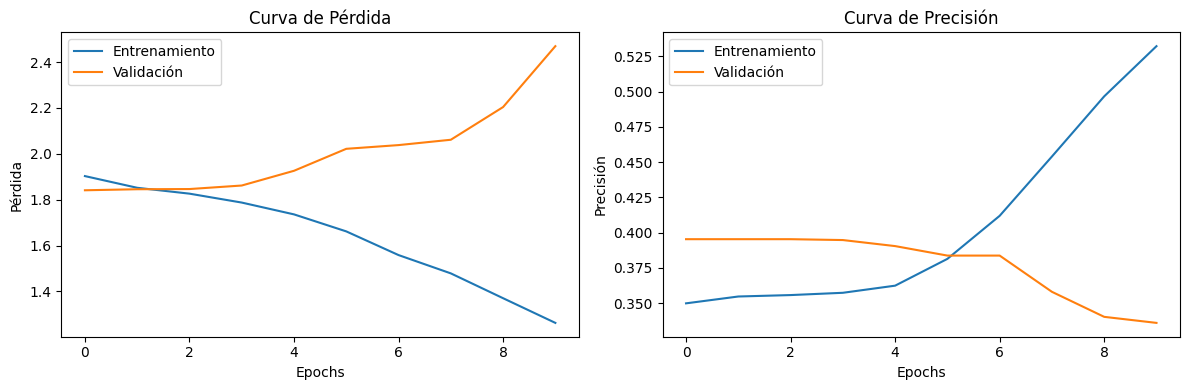

In [75]:
# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Vemos un sobre ajuste consuderable para tratar de solucionarlo hacemos un segundo modelos menos complejo.
# Segundo modelo convolucional.

In [105]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Definir el modelo
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Resumen del modelo
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 225, 225, 8)       80        
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 110, 110, 16)      1168      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 55, 55, 16)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 48400)             0         
                                                                 
 dense_21 (Dense)            (None, 16)               

In [106]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
# Entrenar el modelo
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=16, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
310/310 [==============================] - 28s 90ms/step - loss: 1.6733 - accuracy: 0.4085 - val_loss: 1.9111 - val_accuracy: 0.2601
Epoch 2/10
310/310 [==============================] - 28s 89ms/step - loss: 1.4359 - accuracy: 0.4831 - val_loss: 1.7284 - val_accuracy: 0.3807
Epoch 3/10
310/310 [==============================] - 28s 89ms/step - loss: 1.2876 - accuracy: 0.5484 - val_loss: 1.8893 - val_accuracy: 0.3446
Epoch 4/10
310/310 [==============================] - 28s 89ms/step - loss: 1.1236 - accuracy: 0.6174 - val_loss: 1.7915 - val_accuracy: 0.3880
Epoch 5/10
310/310 [==============================] - 28s 89ms/step - loss: 0.9393 - accuracy: 0.6845 - val_loss: 1.9632 - val_accuracy: 0.3213
Epoch 6/10
310/310 [==============================] - 28s 90ms/step - loss: 0.7481 - accuracy: 0.7490 - val_loss: 1.9831 - val_accuracy: 0.4345
Epoch 7/10
310/310 [==============================] - 27s 89ms/step - loss: 0.5620 - accuracy: 0.8144 - val_loss: 2.1309 - val_accuracy:

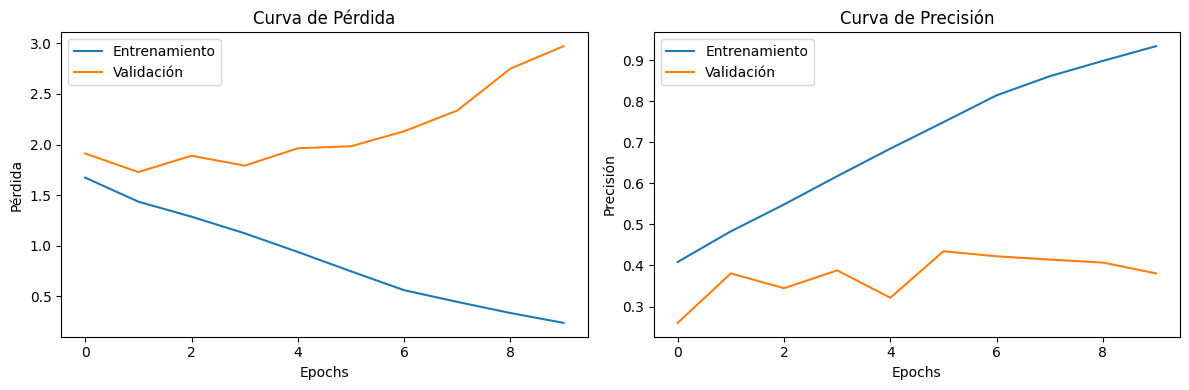

In [108]:
# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Modelo Resnet

In [82]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.models import Sequential, Model

def resnet_block(inputs, filters):
    x = Conv2D(filters, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Añadir capa de convolución 1x1 a inputs para ajustar su número de canales
    shortcut = Conv2D(filters, (1, 1), padding='same')(inputs)
    
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

# Definir el modelo ResNet
inputs = tf.keras.Input(shape=(227, 227, 1))
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = resnet_block(x, 16)
x = MaxPooling2D((2, 2))(x)
x = resnet_block(x, 32)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(8, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Resumen del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 225, 225, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 112, 112, 16  0          ['conv2d_12[0][0]']              
 )                              )                                                             

In [83]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
# Entrenar el modelo
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 88s 566ms/step - loss: 2.2301 - accuracy: 0.3323 - val_loss: 2.0266 - val_accuracy: 0.3953
Epoch 2/10
155/155 [==============================] - 87s 564ms/step - loss: 1.9985 - accuracy: 0.3547 - val_loss: 1.9809 - val_accuracy: 0.3953
Epoch 3/10
155/155 [==============================] - 88s 568ms/step - loss: 1.9545 - accuracy: 0.3547 - val_loss: 1.9444 - val_accuracy: 0.3953
Epoch 4/10
155/155 [==============================] - 86s 553ms/step - loss: 1.9211 - accuracy: 0.3547 - val_loss: 1.9168 - val_accuracy: 0.3953
Epoch 5/10
155/155 [==============================] - 88s 568ms/step - loss: 1.8966 - accuracy: 0.3547 - val_loss: 1.8965 - val_accuracy: 0.3953
Epoch 6/10
155/155 [==============================] - 87s 563ms/step - loss: 1.8791 - accuracy: 0.3547 - val_loss: 1.8820 - val_accuracy: 0.3953
Epoch 7/10
155/155 [==============================] - 87s 563ms/step - loss: 1.8669 - accuracy: 0.3547 - val_loss: 1.8709 - val_ac

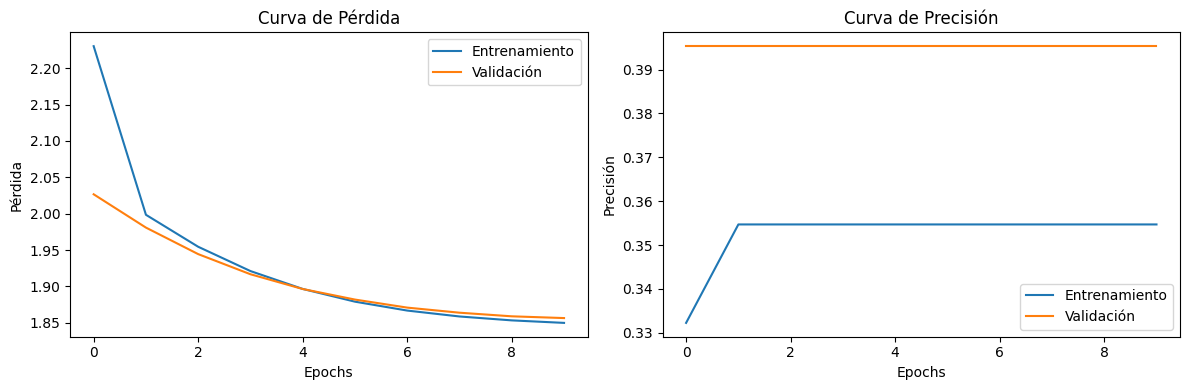

In [85]:
# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Add, Activation, Dropout
from tensorflow.keras.models import Sequential, Model

def resnet_block(inputs, filters):
    x = Conv2D(filters, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Añadir capa de convolución 1x1 a inputs para ajustar su número de canales
    shortcut = Conv2D(filters, (1, 1), padding='same')(inputs)
    
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

# Definir el modelo ResNet
inputs = tf.keras.Input(shape=(227, 227, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = resnet_block(x, 32)
x = MaxPooling2D((2, 2))(x)
x = resnet_block(x, 64)
x = MaxPooling2D((2, 2))(x)
x = resnet_block(x, 128)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Agregar capa de Dropout para regularización
outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Resumen del modelo
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 227, 227, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 225, 225, 32  320         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 112, 112, 32  0          ['conv2d_39[0][0]']              
 )                              )                                                           

In [102]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
# Entrenar el modelo
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 230s 1s/step - loss: 2.6348 - accuracy: 0.3622 - val_loss: 1.8936 - val_accuracy: 0.3953
Epoch 2/10
155/155 [==============================] - 229s 1s/step - loss: 1.5471 - accuracy: 0.4425 - val_loss: 1.7875 - val_accuracy: 0.3953
Epoch 3/10
155/155 [==============================] - 227s 1s/step - loss: 1.3688 - accuracy: 0.4938 - val_loss: 1.6906 - val_accuracy: 0.3960
Epoch 4/10
155/155 [==============================] - 224s 1s/step - loss: 1.2668 - accuracy: 0.5397 - val_loss: 1.7022 - val_accuracy: 0.4437
Epoch 5/10
155/155 [==============================] - 231s 1s/step - loss: 1.1544 - accuracy: 0.5816 - val_loss: 1.5379 - val_accuracy: 0.5165
Epoch 6/10
155/155 [==============================] - 220s 1s/step - loss: 1.0285 - accuracy: 0.6330 - val_loss: 2.5394 - val_accuracy: 0.2558
Epoch 7/10
155/155 [==============================] - 230s 1s/step - loss: 0.9114 - accuracy: 0.6823 - val_loss: 1.7501 - val_accuracy: 0.5006

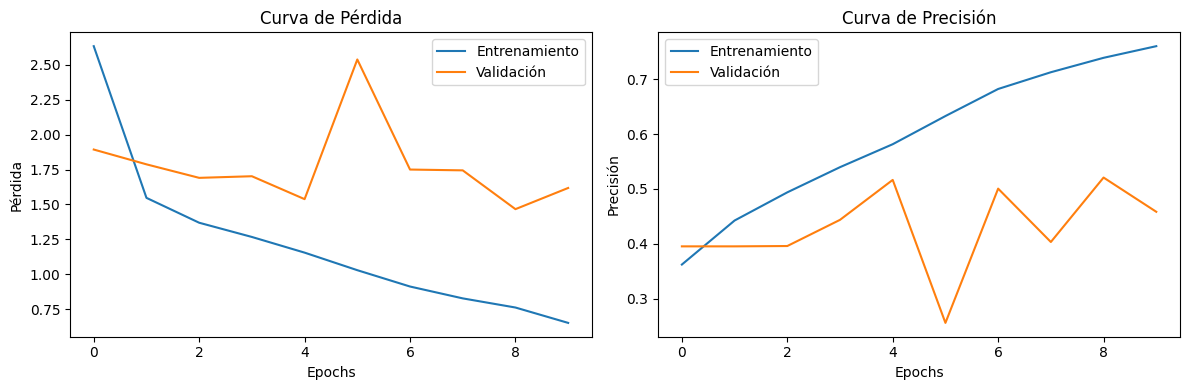

In [104]:
# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

el sobre ajuste se ha mantenido dando no muy buenos resultados, vamos a usar como tercera opcion el uso de  transfer learning utilizando el modelo utilizar el modelo VGG16 
# Modelo VGG16

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Cargar el modelo VGG16 preentrenado sin incluir la capa densa superior
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))
# Congelar las capas existentes del modelo VGG16
for layer in vgg16.layers:
    layer.trainable = False

# Agregar capas adicionales al modelo
x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
x = dropout(0.4)(x)
predictions = Dense(8, activation='softmax')(x)

# Construir el modelo final
model = Model(inputs=vgg16.input, outputs=predictions)

# Resumen del modelo
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [87]:
import cv2
import numpy as np
import os
import csv

carpeta_imagenes = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/map-proj-v3_2"

# Lista de nombres de archivos
nombres_archivos = os.listdir(carpeta_imagenes)

# Ruta del archivo CSV con los nombres de imágenes, etiquetas y categorías
ruta_archivo_csv = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.csv"

# Diccionarios para almacenar las imágenes y etiquetas de train, test y val
imagenes_train = {}
etiquetas_train = {}
imagenes_test = {}
etiquetas_test = {}
imagenes_val = {}
etiquetas_val = {}

# Leer el archivo CSV
with open(ruta_archivo_csv, "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        nombre_imagen, etiqueta, categoria = row

        # Verificar si el nombre de la imagen está en la lista de nombres de archivos
        if nombre_imagen in nombres_archivos:
            ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
            imagen = cv2.imread(ruta_imagen)
            etiqueta = int(etiqueta)

            # Asignar la imagen y etiqueta a la categoría correspondiente
            if categoria == "train":
                imagenes_train[nombre_imagen] = imagen
                etiquetas_train[nombre_imagen] = etiqueta
            elif categoria == "test":
                imagenes_test[nombre_imagen] = imagen
                etiquetas_test[nombre_imagen] = etiqueta
            elif categoria == "val":
                imagenes_val[nombre_imagen] = imagen
                etiquetas_val[nombre_imagen] = etiqueta

# Convertir los diccionarios a listas de numpy
imagenes_train = np.array(list(imagenes_train.values()))
etiquetas_train = np.array(list(etiquetas_train.values()))
imagenes_test = np.array(list(imagenes_test.values()))
etiquetas_test = np.array(list(etiquetas_test.values()))
imagenes_val = np.array(list(imagenes_val.values()))
etiquetas_val = np.array(list(etiquetas_val.values()))

In [88]:
import numpy as np

# Calcular el promedio de datos por categoría (excluyendo la categoría 0)
promedio_datos_train = int(np.mean(np.bincount(etiquetas_train[etiquetas_train != 0])))
promedio_datos_test = int(np.mean(np.bincount(etiquetas_test[etiquetas_test != 0])))
promedio_datos_val = int(np.mean(np.bincount(etiquetas_val[etiquetas_val != 0])))


# Seleccionar índices aleatorios de la categoría 0 train
indices_categoria_0_train = np.where(etiquetas_train == 0)[0]
indices_seleccionados_train = np.random.choice(indices_categoria_0_train, size=promedio_datos_train, replace=False)
# Seleccionar índices aleatorios de la categoría 0 test
indices_categoria_0_test = np.where(etiquetas_test == 0)[0]
indices_seleccionados_test = np.random.choice(indices_categoria_0_test, size=promedio_datos_test, replace=False)
# Seleccionar índices aleatorios de la categoría 0 validacion
indices_categoria_0_val = np.where(etiquetas_val == 0)[0]
indices_seleccionados_val = np.random.choice(indices_categoria_0_val, size=promedio_datos_val, replace=False)

# Obtener los datos seleccionados para la categoría 0 en los conjuntos de entrenamiento, prueba y validación
nuevas_imagenes_train = imagenes_train[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]
nuevas_etiquetas_train = etiquetas_train[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]

nuevas_imagenes_test = imagenes_test[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]
nuevas_etiquetas_test = etiquetas_test[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]

nuevas_imagenes_val = imagenes_val[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]
nuevas_etiquetas_val = etiquetas_val[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]

In [89]:
print(len(nuevas_imagenes_train),len(nuevas_etiquetas_train),len(nuevas_imagenes_test),len(nuevas_etiquetas_test),len(nuevas_imagenes_val),len(nuevas_etiquetas_val))

4945 4945 182 182 1634 1634


In [90]:
import numpy as np
# Normalización de los lotes de imágenes
nuevas_imagenes_train = nuevas_imagenes_train.astype('float32') / 255.0
nuevas_imagenes_test = nuevas_imagenes_test.astype('float32') / 255.0
nuevas_imagenes_val = nuevas_imagenes_val.astype('float32') / 255.0

In [91]:
# Compilar el modelo
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 400s 3s/step - loss: 0.8180 - accuracy: 0.7452 - val_loss: 0.9609 - val_accuracy: 0.6995
Epoch 2/10
155/155 [==============================] - 395s 3s/step - loss: 0.3702 - accuracy: 0.8756 - val_loss: 1.1155 - val_accuracy: 0.6573
Epoch 3/10
155/155 [==============================] - 389s 3s/step - loss: 0.2519 - accuracy: 0.9171 - val_loss: 1.0254 - val_accuracy: 0.7142
Epoch 4/10
155/155 [==============================] - 391s 3s/step - loss: 0.2093 - accuracy: 0.9310 - val_loss: 1.2793 - val_accuracy: 0.6530
Epoch 5/10
155/155 [==============================] - 387s 3s/step - loss: 0.1550 - accuracy: 0.9488 - val_loss: 1.2528 - val_accuracy: 0.6952
Epoch 6/10
155/155 [==============================] - 387s 2s/step - loss: 0.1122 - accuracy: 0.9666 - val_loss: 1.1336 - val_accuracy: 0.7240
Epoch 7/10
155/155 [==============================] - 388s 3s/step - loss: 0.0966 - accuracy: 0.9711 - val_loss: 1.1396 - val_accuracy: 0.7136

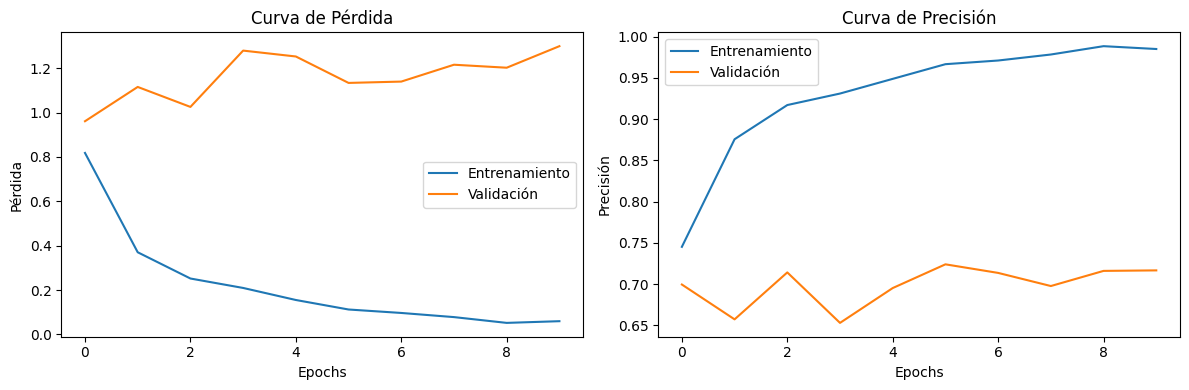

In [93]:
# Visualizar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()